In [36]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from scipy import stats

In [37]:
df = pd.read_csv('/kaggle/input/confer-extension-results/Part4A/Llama/part4a_type4_llama_results.csv', index_col=0)
df

,premise,hypothesis,gold_label,trigger,SetID,UID,Trigger Words,premise_type,predicted_label,expected_logits,attr_result,word_gradients,average_gradient,trigger_gradient,trigger_word_ranking,trigger_word_percentile_ranking
0,Liam believes that his wind tunnel is nearby.,Liam has a wind tunnel.,E,possessive,0,type4_possessive_00,his wind tunnel,Attitude Premise,E,"[0, 0, 1]","{'tokens': ['L', 'iam', 'Ġbelieves', 'Ġthat', ...","{'Liam': -0.0018558390861471707, 'iam': -0.002...",0.000065,-0.001047,2.0,0.181818
1,If Liam is an aerospace engineer and he tests ...,Liam has a wind tunnel.,E,possessive,0,type4_possessive_00,his wind tunnel,Conjunction Premise,E,"[0, 0, 1]","{'tokens': ['If', 'ĠLiam', 'Ġis', 'Ġan', 'Ġaer...","{'If': -0.004163865931332111, 'Liam': -0.00109...",-0.000656,-0.001156,4.0,0.181818
2,"Either Liam isn't an aerospace engineer, or he...",Liam has a wind tunnel.,E,possessive,0,type4_possessive_00,his wind tunnel,Disjunction Premise,E,"[0, 0, 1]","{'tokens': ['Either', 'ĠLiam', 'Ġisn', ""'t"", '...","{'Either': -0.0023187249898910522, 'Liam': 0.0...",0.000148,0.002882,4.0,0.200000
3,"If Liam is an aerospace engineer, he'll test t...",Liam has a wind tunnel.,E,possessive,0,type4_possessive_00,his wind tunnel,premise,E,"[0, 0, 1]","{'tokens': ['If', 'ĠLiam', 'Ġis', 'Ġan', 'Ġaer...","{'If': 1.275778777198866e-05, 'Liam': 0.003695...",0.001006,0.000006,11.0,0.578947
4,Bill believes that his content management appl...,Bill has a content management application.,E,possessive,1,type4_possessive_01,his content management application,Attitude Premise,N,"[0, 0, 1]","{'tokens': ['Bill', 'Ġbelieves', 'Ġthat', 'Ġhi...","{'Bill': 0.0024569739180151373, 'believes': -0...",0.000215,0.000036,5.0,0.454545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,"If Maya is a piano teacher, she'll bring her m...",Maya has a metronome.,E,possessive,97,type4_possessive_97,her metronome,premise,E,"[0, 0, 1]","{'tokens': ['If', 'ĠMaya', 'Ġis', 'Ġa', 'Ġpian...","{'If': -0.007241163402795792, 'Maya': 6.561540...",0.000163,0.000341,5.0,0.294118
392,Aliya believes that her scrub is in the locker...,Aliya has scrubs.,E,possessive,98,type4_possessive_98,her scrub,Attitude Premise,E,"[0, 0, 1]","{'tokens': ['Ali', 'ya', 'Ġbelieves', 'Ġthat',...","{'Aliya': 0.0012238369090482593, 'ya': 0.00031...",0.000474,0.000014,12.0,0.857143
393,If Aliya is a nurse and she wears her scrub to...,Aliya has scrubs.,E,possessive,98,type4_possessive_98,her scrub,Conjunction Premise,E,"[0, 0, 1]","{'tokens': ['If', 'ĠAli', 'ya', 'Ġis', 'Ġa', '...","{'If': -0.0037666652351617813, 'Aliya': 0.0010...",-0.000338,-0.000056,13.0,0.619048
394,"Either Aliya isn't a nurse, or she wears her s...",Aliya has scrubs.,E,possessive,98,type4_possessive_98,her scrub,Disjunction Premise,E,"[0, 0, 1]","{'tokens': ['Either', 'ĠAli', 'ya', 'Ġisn', ""'...","{'Either': -0.0023517266381531954, 'Aliya': -0...",-0.000269,0.000182,16.0,0.842105


In [38]:
df['Trigger IG / Avg. IG'] = df['trigger_gradient'] / df['average_gradient']
df

,premise,hypothesis,gold_label,trigger,SetID,UID,Trigger Words,premise_type,predicted_label,expected_logits,attr_result,word_gradients,average_gradient,trigger_gradient,trigger_word_ranking,trigger_word_percentile_ranking,Trigger IG / Avg. IG
0,Liam believes that his wind tunnel is nearby.,Liam has a wind tunnel.,E,possessive,0,type4_possessive_00,his wind tunnel,Attitude Premise,E,"[0, 0, 1]","{'tokens': ['L', 'iam', 'Ġbelieves', 'Ġthat', ...","{'Liam': -0.0018558390861471707, 'iam': -0.002...",0.000065,-0.001047,2.0,0.181818,-15.994708
1,If Liam is an aerospace engineer and he tests ...,Liam has a wind tunnel.,E,possessive,0,type4_possessive_00,his wind tunnel,Conjunction Premise,E,"[0, 0, 1]","{'tokens': ['If', 'ĠLiam', 'Ġis', 'Ġan', 'Ġaer...","{'If': -0.004163865931332111, 'Liam': -0.00109...",-0.000656,-0.001156,4.0,0.181818,1.761248
2,"Either Liam isn't an aerospace engineer, or he...",Liam has a wind tunnel.,E,possessive,0,type4_possessive_00,his wind tunnel,Disjunction Premise,E,"[0, 0, 1]","{'tokens': ['Either', 'ĠLiam', 'Ġisn', ""'t"", '...","{'Either': -0.0023187249898910522, 'Liam': 0.0...",0.000148,0.002882,4.0,0.200000,19.465839
3,"If Liam is an aerospace engineer, he'll test t...",Liam has a wind tunnel.,E,possessive,0,type4_possessive_00,his wind tunnel,premise,E,"[0, 0, 1]","{'tokens': ['If', 'ĠLiam', 'Ġis', 'Ġan', 'Ġaer...","{'If': 1.275778777198866e-05, 'Liam': 0.003695...",0.001006,0.000006,11.0,0.578947,0.005735
4,Bill believes that his content management appl...,Bill has a content management application.,E,possessive,1,type4_possessive_01,his content management application,Attitude Premise,N,"[0, 0, 1]","{'tokens': ['Bill', 'Ġbelieves', 'Ġthat', 'Ġhi...","{'Bill': 0.0024569739180151373, 'believes': -0...",0.000215,0.000036,5.0,0.454545,0.167642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,"If Maya is a piano teacher, she'll bring her m...",Maya has a metronome.,E,possessive,97,type4_possessive_97,her metronome,premise,E,"[0, 0, 1]","{'tokens': ['If', 'ĠMaya', 'Ġis', 'Ġa', 'Ġpian...","{'If': -0.007241163402795792, 'Maya': 6.561540...",0.000163,0.000341,5.0,0.294118,2.090984
392,Aliya believes that her scrub is in the locker...,Aliya has scrubs.,E,possessive,98,type4_possessive_98,her scrub,Attitude Premise,E,"[0, 0, 1]","{'tokens': ['Ali', 'ya', 'Ġbelieves', 'Ġthat',...","{'Aliya': 0.0012238369090482593, 'ya': 0.00031...",0.000474,0.000014,12.0,0.857143,0.029034
393,If Aliya is a nurse and she wears her scrub to...,Aliya has scrubs.,E,possessive,98,type4_possessive_98,her scrub,Conjunction Premise,E,"[0, 0, 1]","{'tokens': ['If', 'ĠAli', 'ya', 'Ġis', 'Ġa', '...","{'If': -0.0037666652351617813, 'Aliya': 0.0010...",-0.000338,-0.000056,13.0,0.619048,0.167200
394,"Either Aliya isn't a nurse, or she wears her s...",Aliya has scrubs.,E,possessive,98,type4_possessive_98,her scrub,Disjunction Premise,E,"[0, 0, 1]","{'tokens': ['Either', 'ĠAli', 'ya', 'Ġisn', ""'...","{'Either': -0.0023517266381531954, 'Aliya': -0...",-0.000269,0.000182,16.0,0.842105,-0.674540


In [39]:
orig_data = df[df['premise_type'] == 'premise']['Trigger IG / Avg. IG']
new_data = df[df['premise_type'] != 'premise']['Trigger IG / Avg. IG']

In [40]:
def get_mean_ci(data):
    mean = np.mean(data)
    sem = stats.sem(data)
    ci = stats.t.interval(0.95, len(data)-1, loc=mean, scale=sem) 
    return mean, ci 

In [41]:
tigger_ratios = df['Trigger IG / Avg. IG']
mean = np.mean(tigger_ratios)
sem = stats.sem(tigger_ratios)
ci = stats.t.interval(0.95, len(tigger_ratios)-1, loc=mean, scale=sem)
ci

(-3.5501566513433906, 4.747098964836372)

In [42]:
orig_mean, orig_ci = get_mean_ci(orig_data)
new_mean, new_ci = get_mean_ci(new_data)

In [44]:
orig_means = {}
new_means = {}
orig_cis = {}
new_cis = {}

In [45]:
# RoBERTa
model_name = 'RoBERTa'
df = pd.read_csv(f'/kaggle/input/confer-extension-results/Part4A_New_Complete/{model_name}/part4a_type4_{model_name.lower()}_results.csv', index_col=0)
df['Trigger IG / Avg. IG'] = df['trigger_gradient'] / df['average_gradient']
orig_data = df[df['premise_type'] == 'premise']['Trigger IG / Avg. IG']
new_data = df[df['premise_type'] != 'premise']['Trigger IG / Avg. IG']
orig_means[model_name], orig_cis[model_name] = get_mean_ci(orig_data)
new_means[model_name], new_cis[model_name] = get_mean_ci(new_data)

In [46]:
model_name = 'DeBERTa'
df = pd.read_csv(f'/kaggle/input/confer-extension-results/Part4A_New_Complete/{model_name}/part4a_type4_{model_name.lower()}_results.csv', index_col=0)
df['Trigger IG / Avg. IG'] = df['trigger_gradient'] / df['average_gradient']
orig_data = df[df['premise_type'] == 'premise']['Trigger IG / Avg. IG']
new_data = df[df['premise_type'] != 'premise']['Trigger IG / Avg. IG']
orig_means[model_name], orig_cis[model_name] = get_mean_ci(orig_data)
new_means[model_name], new_cis[model_name] = get_mean_ci(new_data)

In [47]:
model_name = 'Llama'
df = pd.read_csv(f'/kaggle/input/confer-extension-results/Part4A_New_Complete/{model_name}/part4a_type4_{model_name.lower()}_results.csv', index_col=0)
df['Trigger IG / Avg. IG'] = df['trigger_gradient'] / df['average_gradient']
orig_data = df[df['premise_type'] == 'premise']['Trigger IG / Avg. IG']
new_data = df[df['premise_type'] != 'premise']['Trigger IG / Avg. IG']
orig_means[model_name], orig_cis[model_name] = get_mean_ci(orig_data)
new_means[model_name], new_cis[model_name] = get_mean_ci(new_data)

In [48]:
model_name = 'Gemma'
df = pd.read_csv(f'/kaggle/input/confer-extension-results/Part4A_New_Complete/{model_name}/part4a_type4_{model_name.lower()}_results.csv', index_col=0)
df['Trigger IG / Avg. IG'] = df['trigger_gradient'] / df['average_gradient']
orig_data = df[df['premise_type'] == 'premise']['Trigger IG / Avg. IG']
new_data = df[df['premise_type'] != 'premise']['Trigger IG / Avg. IG']
orig_means[model_name], orig_cis[model_name] = get_mean_ci(orig_data)
new_means[model_name], new_cis[model_name] = get_mean_ci(new_data)

In [49]:
orig_means

{'RoBERTa': 14.389294466123227,
 'DeBERTa': 0.378096452794035,
 'Llama': -2.2911113805229766,
 'Gemma': 1.0136948740371539}

In [50]:
orig_cis

{'RoBERTa': (12.217555529669763, 16.56103340257669),
 'DeBERTa': (0.3473610699450258, 0.40883183564304415),
 'Llama': (-9.752028995265063, 5.169806234219109),
 'Gemma': (-0.20533050091238847, 2.232720248986696)}

In [51]:
new_means

{'RoBERTa': 12.683953459915713,
 'DeBERTa': 0.48138470849102166,
 'Llama': 2.09969154946592,
 'Gemma': -7.561501738907726}

In [52]:
pd.concat([pd.DataFrame(orig_means,index=['Trigger IG Ratio']),pd.DataFrame(new_means,index=['Trigger IG Ratio'])])

,RoBERTa,DeBERTa,Llama,Gemma
Trigger IG Ratio,14.389294,0.378096,-2.291111,1.013695
Trigger IG Ratio,12.683953,0.481385,2.099692,-7.561502


In [53]:
orig_cis

{'RoBERTa': (12.217555529669763, 16.56103340257669),
 'DeBERTa': (0.3473610699450258, 0.40883183564304415),
 'Llama': (-9.752028995265063, 5.169806234219109),
 'Gemma': (-0.20533050091238847, 2.232720248986696)}

In [54]:
new_cis

{'RoBERTa': (11.666004405153458, 13.701902514677968),
 'DeBERTa': (0.46186500353151055, 0.5009044134505328),
 'Llama': (-0.9906864392385355, 5.190069538170375),
 'Gemma': (-18.062337579356175, 2.939334101540723)}

In [55]:
xtick_labels = []
for model_name in orig_means.keys():
    xtick_labels.extend([f'{model_name} \n Type 4 \n Original', f'{model_name} \n Type 4 \n New'])
xtick_labels

['RoBERTa \n Type 4 \n Original',
 'RoBERTa \n Type 4 \n New',
 'DeBERTa \n Type 4 \n Original',
 'DeBERTa \n Type 4 \n New',
 'Llama \n Type 4 \n Original',
 'Llama \n Type 4 \n New',
 'Gemma \n Type 4 \n Original',
 'Gemma \n Type 4 \n New']

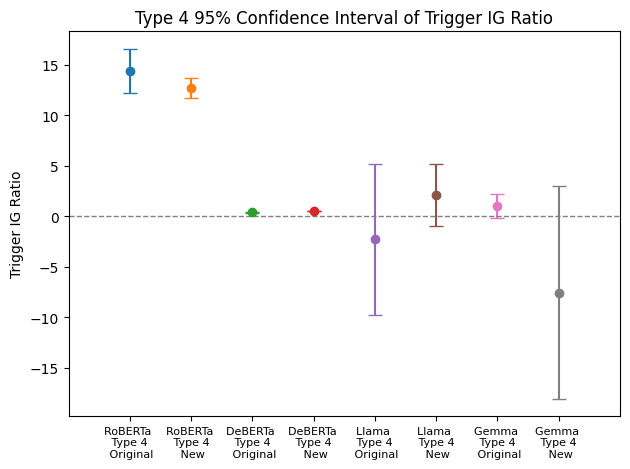

In [56]:
fig, ax = plt.subplots()

i = 1
for model_name in orig_means.keys():
    # Plot mean as a point
    orig_mean = orig_means[model_name]
    orig_ci = orig_cis[model_name]
    new_mean = new_means[model_name]
    new_ci = new_cis[model_name]
    
    ax.errorbar(
        x=i, # x-axis position counter 
        y=orig_means[model_name],
        yerr=[[orig_mean - orig_ci[0]], [orig_ci[1] - orig_mean]],  
        fmt='o',
        capsize=5,
        label=f'{model_name} Type 4 Original Mean ± 95% CI'
    )
    i += 1
    ax.errorbar(
        x=i, 
        y=new_mean,
        yerr=[[new_mean - new_ci[0]], [new_ci[1] - new_mean]],  
        fmt='o',
        capsize=5,
        label=f'{model_name} Type 4 New Mean ± 95% CI'
    )
    i += 1

ax.set_xlim(0, i)
ax.set_xticks([x for x in range(1,i)])
ax.set_xticklabels(xtick_labels, fontsize=8)
ax.set_ylabel('Trigger IG Ratio')
ax.set_title('Type 4 95% Confidence Interval of Trigger IG Ratio')
ax.axhline(y=0, color='gray', linestyle='--', linewidth=1)

plt.savefig('Part4A_type4.pdf',format='pdf', bbox_inches='tight')

plt.tight_layout()
plt.show()

## Type 5A

In [57]:
orig_means = {}
new_means = {}
orig_cis = {}
new_cis = {}

In [58]:
# RoBERTa
model_name = 'RoBERTa'
df = pd.read_csv(f'/kaggle/input/confer-extension-results/Part4A_New_Complete/{model_name}/part4a_type5a_{model_name.lower()}_results.csv', index_col=0)
df['Trigger IG / Avg. IG'] = df['trigger_gradient'] / df['average_gradient']
orig_data = df[df['premise_type'] == 'premise']['Trigger IG / Avg. IG']
new_data = df[df['premise_type'] != 'premise']['Trigger IG / Avg. IG']
orig_means[model_name], orig_cis[model_name] = get_mean_ci(orig_data)
new_means[model_name], new_cis[model_name] = get_mean_ci(new_data)

In [59]:
model_name = 'DeBERTa'
df = pd.read_csv(f'/kaggle/input/confer-extension-results/Part4A_New_Complete/{model_name}/part4a_type5a_{model_name.lower()}_results.csv', index_col=0)
df['Trigger IG / Avg. IG'] = df['trigger_gradient'] / df['average_gradient']
orig_data = df[df['premise_type'] == 'premise']['Trigger IG / Avg. IG']
new_data = df[df['premise_type'] != 'premise']['Trigger IG / Avg. IG']
orig_means[model_name], orig_cis[model_name] = get_mean_ci(orig_data)
new_means[model_name], new_cis[model_name] = get_mean_ci(new_data)

In [60]:
model_name = 'Llama'
df = pd.read_csv(f'/kaggle/input/confer-extension-results/Part4A_New_Complete/{model_name}/part4a_type5a_{model_name.lower()}_results.csv', index_col=0)
df['Trigger IG / Avg. IG'] = df['trigger_gradient'] / df['average_gradient']
orig_data = df[df['premise_type'] == 'premise']['Trigger IG / Avg. IG']
new_data = df[df['premise_type'] != 'premise']['Trigger IG / Avg. IG']
orig_means[model_name], orig_cis[model_name] = get_mean_ci(orig_data)
new_means[model_name], new_cis[model_name] = get_mean_ci(new_data)

In [61]:
model_name = 'Gemma'
df = pd.read_csv(f'/kaggle/input/confer-extension-results/Part4A_New_Complete/{model_name}/part4a_type5a_{model_name.lower()}_results.csv', index_col=0)
df['Trigger IG / Avg. IG'] = df['trigger_gradient'] / df['average_gradient']
orig_data = df[df['premise_type'] == 'premise']['Trigger IG / Avg. IG']
new_data = df[df['premise_type'] != 'premise']['Trigger IG / Avg. IG']
orig_means[model_name], orig_cis[model_name] = get_mean_ci(orig_data)
new_means[model_name], new_cis[model_name] = get_mean_ci(new_data)

In [62]:
pd.concat([pd.DataFrame(orig_means,index=['Trigger IG Ratio']),pd.DataFrame(new_means,index=['Trigger IG Ratio'])])

,RoBERTa,DeBERTa,Llama,Gemma
Trigger IG Ratio,11.460867,0.654705,14.254997,-20.566425
Trigger IG Ratio,11.169577,0.696336,-1.284477,2.167583


In [63]:
xtick_labels = []
for model_name in orig_means.keys():
    xtick_labels.extend([f'{model_name} \n Type 5A \n Original', f'{model_name} \n Type 5A \n New'])

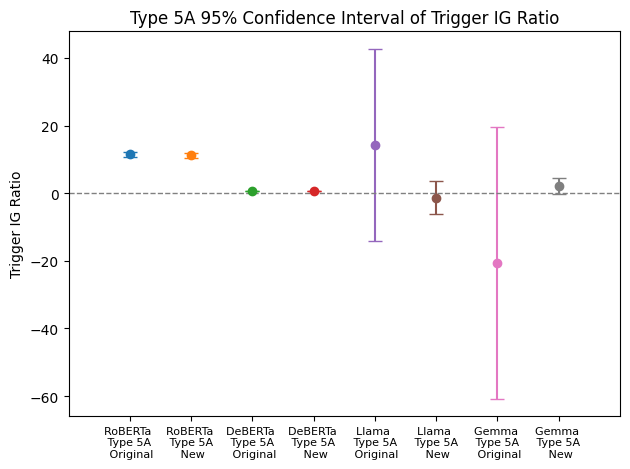

In [64]:
fig, ax = plt.subplots()

i = 1
for model_name in orig_means.keys():
    # Plot mean as a point
    orig_mean = orig_means[model_name]
    orig_ci = orig_cis[model_name]
    new_mean = new_means[model_name]
    new_ci = new_cis[model_name]
    
    ax.errorbar(
        x=i, # x-axis position counter 
        y=orig_means[model_name],
        yerr=[[orig_mean - orig_ci[0]], [orig_ci[1] - orig_mean]],  
        fmt='o',
        capsize=5,
        label=f'{model_name} Type 5A Original Mean ± 95% CI'
    )
    i += 1
    ax.errorbar(
        x=i, 
        y=new_mean,
        yerr=[[new_mean - new_ci[0]], [new_ci[1] - new_mean]],  
        fmt='o',
        capsize=5,
        label=f'{model_name} Type 5A New Mean ± 95% CI'
    )
    i += 1

ax.set_xlim(0, i)
ax.set_xticks([x for x in range(1,i)])
ax.set_xticklabels(xtick_labels, fontsize=8)
ax.set_ylabel('Trigger IG Ratio')
ax.set_title('Type 5A 95% Confidence Interval of Trigger IG Ratio')
ax.axhline(y=0, color='gray', linestyle='--', linewidth=1)
# ax.legend()

plt.tight_layout()
plt.savefig('Part4A_type5A.pdf',format='pdf', bbox_inches='tight')
plt.show()

##  Type 5P

In [65]:
orig_means = {}
new_means = {}
orig_cis = {}
new_cis = {}

In [66]:
# RoBERTa
model_name = 'RoBERTa'
df = pd.read_csv(f'/kaggle/input/confer-extension-results/Part4A_New_Complete/{model_name}/part4a_type5p_{model_name.lower()}_results.csv', index_col=0)
df['Trigger IG / Avg. IG'] = df['trigger_gradient'] / df['average_gradient']
orig_data = df[df['premise_type'] == 'premise']['Trigger IG / Avg. IG']
new_data = df[df['premise_type'] != 'premise']['Trigger IG / Avg. IG']
orig_means[model_name], orig_cis[model_name] = get_mean_ci(orig_data)
new_means[model_name], new_cis[model_name] = get_mean_ci(new_data)

In [67]:
model_name = 'DeBERTa'
df = pd.read_csv(f'/kaggle/input/confer-extension-results/Part4A_New_Complete/{model_name}/part4a_type5p_{model_name.lower()}_results.csv', index_col=0)
df['Trigger IG / Avg. IG'] = df['trigger_gradient'] / df['average_gradient']
orig_data = df[df['premise_type'] == 'premise']['Trigger IG / Avg. IG']
new_data = df[df['premise_type'] != 'premise']['Trigger IG / Avg. IG']
orig_means[model_name], orig_cis[model_name] = get_mean_ci(orig_data)
new_means[model_name], new_cis[model_name] = get_mean_ci(new_data)

In [68]:
model_name = 'Llama'
df = pd.read_csv(f'/kaggle/input/confer-extension-results/Part4A_New_Complete/{model_name}/part4a_type5p_{model_name.lower()}_results.csv', index_col=0)
df['Trigger IG / Avg. IG'] = df['trigger_gradient'] / df['average_gradient']
orig_data = df[df['premise_type'] == 'premise']['Trigger IG / Avg. IG']
new_data = df[df['premise_type'] != 'premise']['Trigger IG / Avg. IG']
orig_data = orig_data[np.isfinite(orig_data)]
new_data = new_data[np.isfinite(new_data)]
orig_means[model_name], orig_cis[model_name] = get_mean_ci(orig_data)
new_means[model_name], new_cis[model_name] = get_mean_ci(new_data)

In [69]:
model_name = 'Gemma'
df = pd.read_csv(f'/kaggle/input/confer-extension-results/Part4A_New_Complete/{model_name}/part4a_type5p_{model_name.lower()}_results.csv', index_col=0)
df['Trigger IG / Avg. IG'] = df['trigger_gradient'] / df['average_gradient']
orig_data = df[df['premise_type'] == 'premise']['Trigger IG / Avg. IG']
new_data = df[df['premise_type'] != 'premise']['Trigger IG / Avg. IG']
orig_means[model_name], orig_cis[model_name] = get_mean_ci(orig_data)
new_means[model_name], new_cis[model_name] = get_mean_ci(new_data)

In [70]:
pd.concat([pd.DataFrame(orig_means,index=['Trigger IG Ratio']),pd.DataFrame(new_means,index=['Trigger IG Ratio'])])

,RoBERTa,DeBERTa,Llama,Gemma
Trigger IG Ratio,12.212635,0.731414,0.745880,1.973853
Trigger IG Ratio,12.993806,0.653608,30.466668,-0.609127


In [71]:
orig_cis

{'RoBERTa': (11.436591362503647, 12.988679254900555),
 'DeBERTa': (0.7133111521633768, 0.7495177923889764),
 'Llama': (-3.8051467153807446, 5.296906357324834),
 'Gemma': (0.3902183250671438, 3.5574867523834124)}

In [72]:
new_cis

{'RoBERTa': (12.287236348813579, 13.700376562717647),
 'DeBERTa': (0.6413564213967965, 0.6658597210037583),
 'Llama': (-31.682815984103996, 92.61615131565159),
 'Gemma': (-2.80346226237877, 1.5852085241234883)}

In [73]:
xtick_labels = []
for model_name in orig_means.keys():
    xtick_labels.extend([f'{model_name} \n Type 5P \n Original', f'{model_name} \n Type 5P \n New'])

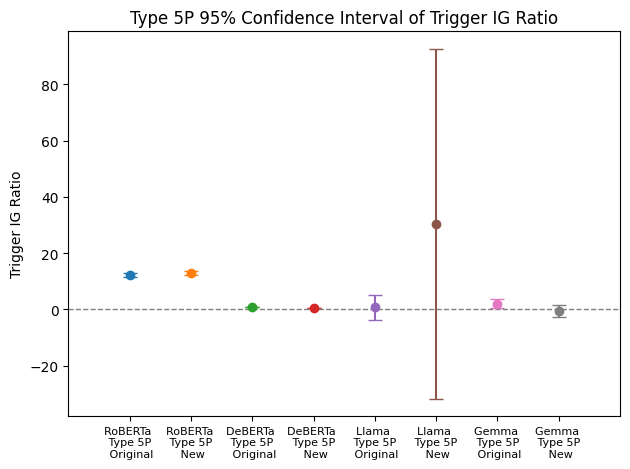

In [74]:
fig, ax = plt.subplots()

i = 1
for model_name in orig_means.keys():
    # Plot mean as a point
    orig_mean = orig_means[model_name]
    orig_ci = orig_cis[model_name]
    new_mean = new_means[model_name]
    new_ci = new_cis[model_name]
    
    ax.errorbar(
        x=i, # x-axis position counter 
        y=orig_means[model_name],
        yerr=[[orig_mean - orig_ci[0]], [orig_ci[1] - orig_mean]],  
        fmt='o',
        capsize=5,
        label=f'{model_name} Type 5P Original Mean ± 95% CI'
    )
    i += 1
    ax.errorbar(
        x=i, 
        y=new_mean,
        yerr=[[new_mean - new_ci[0]], [new_ci[1] - new_mean]],  
        fmt='o',
        capsize=5,
        label=f'{model_name} Type 5P New Mean ± 95% CI'
    )
    i += 1

ax.set_xlim(0, i)
# ax.set_ylim(-50, 50)
ax.set_xticks([x for x in range(1,i)])
ax.set_xticklabels(xtick_labels, fontsize=8)
ax.set_ylabel('Trigger IG Ratio')
ax.set_title('Type 5P 95% Confidence Interval of Trigger IG Ratio')
ax.axhline(y=0, color='gray', linestyle='--', linewidth=1)
plt.savefig('Part4A_type5P.pdf',format='pdf', bbox_inches='tight')

plt.tight_layout()
plt.show()